In [36]:
# The DBSCAN works without using labeled output, it finds patterns and clusters in the data by itself
# the data contains features of different animals
# DBSCAN (Density-Based Spatial Clustering of Applications With Noise)
# We are using this Model to explore and find natural groupings in the animal traits — without using the actual class labels during clustering
# so there were three files one with the actual dataset, the other two with info about the dataset

# Now let's load the data
import pandas as pd

# The dataset has it columns names not attached so we do that accordingly
# We provide the column names because the original file has no header
columns = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
    'legs', 'tail', 'domestic', 'catsize', 'type'
]

zoo_df = pd.read_csv("zoo.data", names=columns)

In [37]:
# preview of the data
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [38]:
zoo_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [39]:
# Next we will do the Exploratory Data Analysis 
# which includes Summary stats, Data types, Null Checks, Value distributions

In [40]:
# We do Basic Info and Summary Check
#  basic info: data types and missing values
# .info() tells us about data types and missing values
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [41]:
# Summary statistics for numeric columns (like legs, type)
# .describe() gives stats like mean, min, max for numeric columns
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


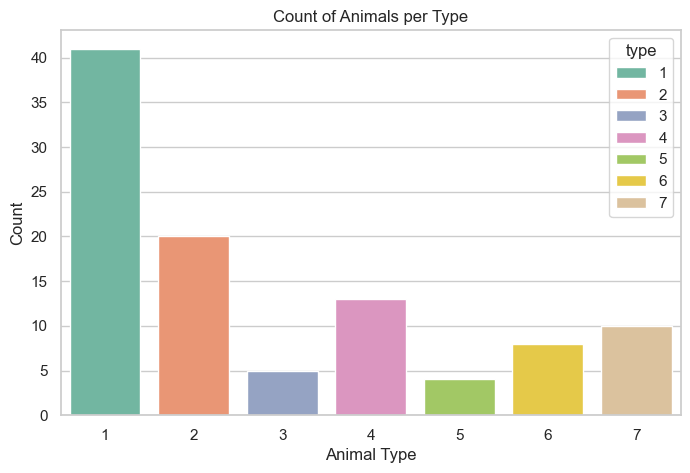

In [42]:
# EDA visualizations to understand the Zoo dataset
# matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=zoo_df, hue='type', palette='Set2')
plt.title('Count of Animals per Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [43]:
#         1 (41) aardvark, antelope, bear, boar, buffalo, calf,
#                  cavy, cheetah, deer, dolphin, elephant,
#                  fruitbat, giraffe, girl, goat, gorilla, hamster,
#                  hare, leopard, lion, lynx, mink, mole, mongoose,
#                  opossum, oryx, platypus, polecat, pony,
#                  porpoise, puma, pussycat, raccoon, reindeer,
#                  seal, sealion, squirrel, vampire, vole, wallaby,wolf
#          2 (20) chicken, crow, dove, duck, flamingo, gull, hawk,
#                  kiwi, lark, ostrich, parakeet, penguin, pheasant,
#                  rhea, skimmer, skua, sparrow, swan, vulture, wren
#           3 (5)  pitviper, seasnake, slowworm, tortoise, tuatara 
#           4 (13) bass, carp, catfish, chub, dogfish, haddock,
#                 herring, pike, piranha, seahorse, sole, stingray, tuna
#           5 (4)  frog, frog, newt, toad 
#           6 (8)  flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
#           7 (10) clam, crab, crayfish, lobster, octopus,
#                  scorpion, seawasp, slug, starfish, worm ) 

In [44]:
#Shows how many animals belong to each class (type)
#Helps understand class imbalance
#e.g. Type 1 = Mammals, Type 2 = Birds, etc.

C:\Users\Kwaku Bonful\AppData\Local\Temp\ipykernel_9824\1019476078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='legs', data=zoo_df, palette='Set3')


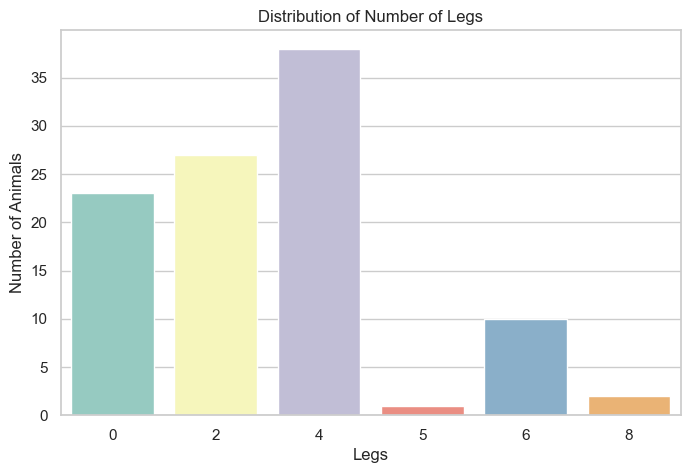

In [45]:
#  Distribution of Number of Legs
plt.figure(figsize=(8, 5))
sns.countplot(x='legs', data=zoo_df, palette='Set3')
plt.title('Distribution of Number of Legs')
plt.xlabel('Legs')
plt.ylabel('Number of Animals')
plt.show()

In [46]:
# Reveals how many animals have 0, 2, 4, etc., legs
# Useful for clustering later

<function matplotlib.pyplot.show(close=None, block=None)>

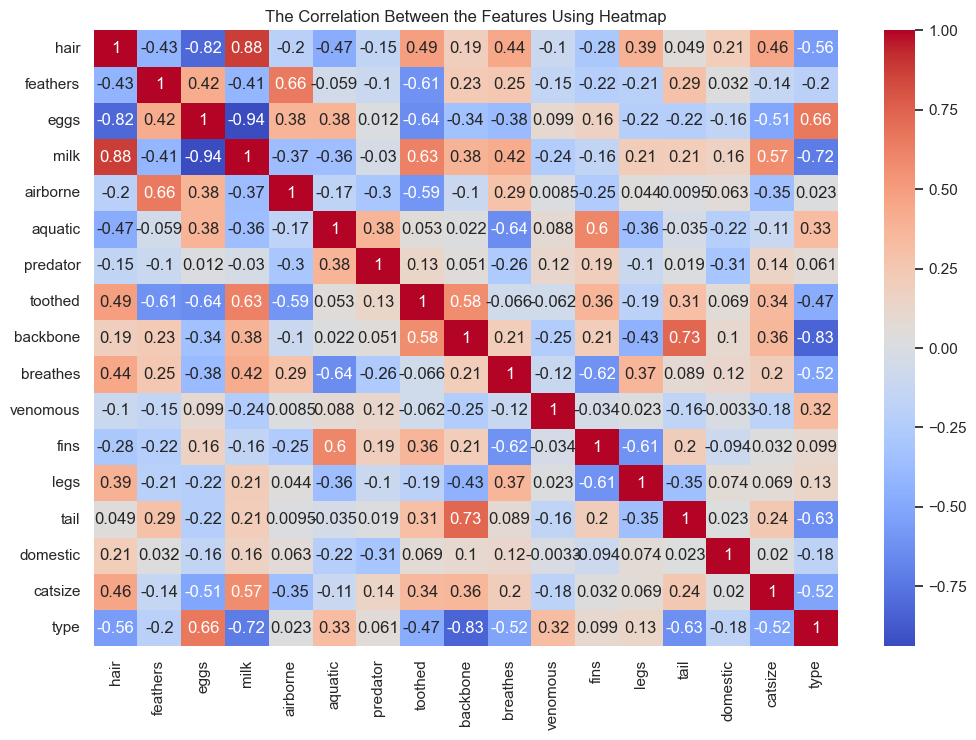

In [47]:
# Now we introduce Heatmap to see how the Features Are Correlated
plt.figure(figsize=(12, 8))
sns.heatmap(zoo_df.drop(['animal_name'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('The Correlation Between the Features Using Heatmap')
plt.show

In [48]:
# (       The heatmap visualizes correlation coefficients between all numeric features in the Zoo dataset. Correlation measures how strongly two features are related to each other.
#Values range from -1 to +1:
#+1 → Strong positive correlation (both go up together)
#0 → No correlation
#–1 → Strong negative correlation (one goes up, the other goes down)

# 0.88 hair and milk show a strong positive correlation — this makes sense, as mammals usually have both
# feathers has low or negative correlation with most features — birds are quite different from mammals and fish
#  eggs and milk are negatively correlated — animals that lay eggs usually don’t produce milk
#  toothed, backbone, and breathes show positive correlations — common traits in vertebrates
#  legs has low correlation with most traits, meaning the number of legs doesn’t strongly relate to other features

# This helps us understand:
#hich features might be redundant
#Which traits tend to appear together
#How groups of animals share common traits


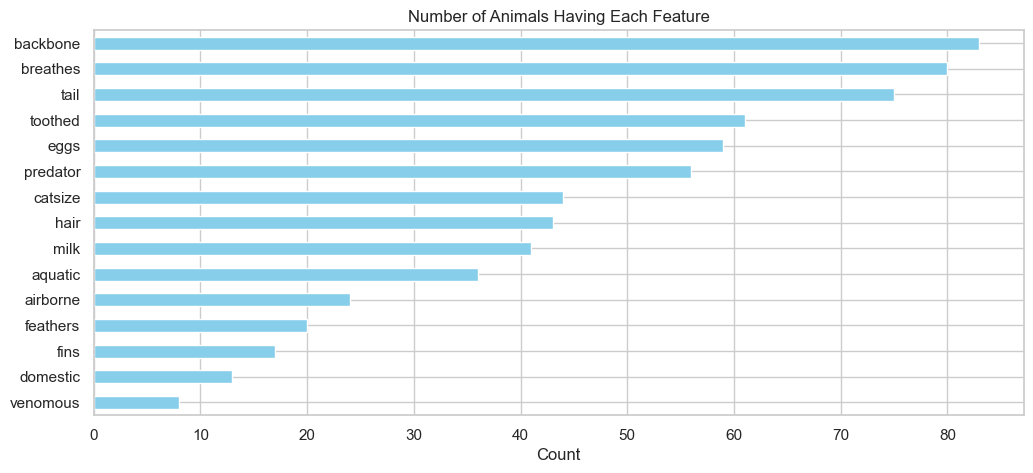

In [49]:
# Count of Boolean Features (hair, feathers, etc.)
bool_cols = zoo_df.drop(columns=['animal_name', 'legs', 'type'])

plt.figure(figsize=(12,5))
bool_cols.sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Animals Having Each Feature')
plt.xlabel('Count')
plt.show()

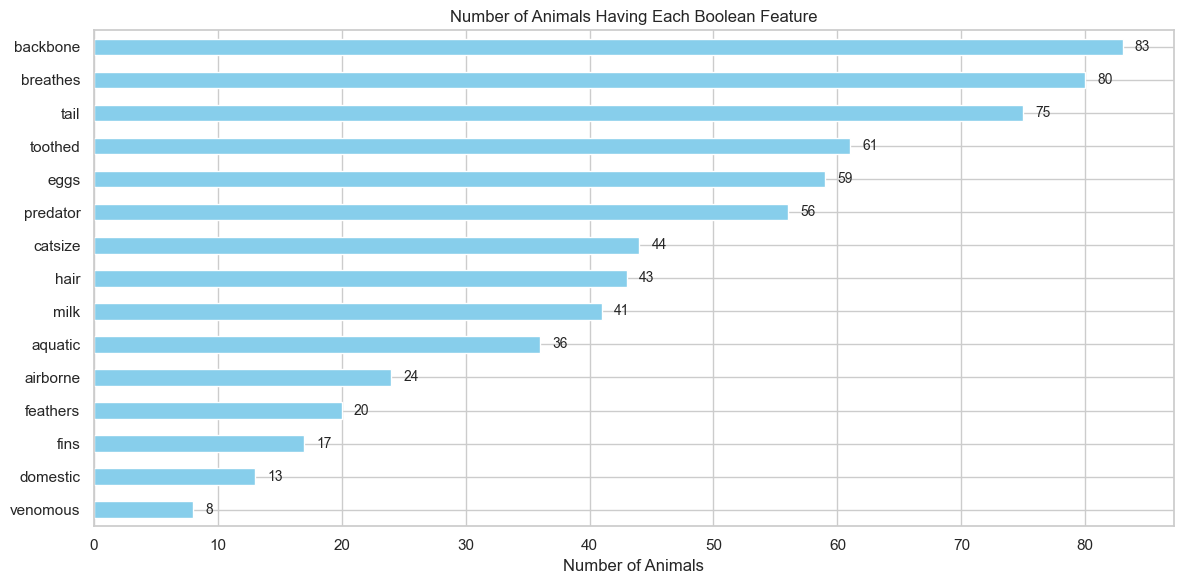

In [50]:
# Drop non-binary columns
bool_cols = zoo_df.drop(columns=['animal_name', 'legs', 'type'])

# Sum each boolean feature to get count of animals where value = 1
feature_counts = bool_cols.sum().sort_values()

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = feature_counts.plot(kind='barh', color='skyblue')

# Add exact count labels to each bar
for index, value in enumerate(feature_counts):
    plt.text(value + 1, index, str(int(value)), va='center', fontsize=10)

# Add titles and labels
plt.title('Number of Animals Having Each Boolean Feature')
plt.xlabel('Number of Animals')
plt.tight_layout()
plt.show()

In [51]:
# This chart shows how many animals in our dataset have each specific trait — like hair, feathers, or the ability to lay eggs
# Each bar represents one trait (like “has hair” or “lays eggs”)
# The longer the bar, the more animals in the dataset that have that trait
# 88 animals have a backbone, making it the most common trait.
# Only 8 animals are venomous, so that’s quite rare.
# 41 animals have hair, which matches with how many mammals are in the dataset.

# This helps us quickly understand:
# Which animal features are very common
# Which features are less frequent
# What kinds of traits we’re working with overall

In [52]:
# Feature Engineering
# NOW WE PREPARE THE DATA FOR MODELLING 
# Clustering like DBSCAN

In [ ]:
#Before we apply the clustering algorithm, we need to prepare the data properly. 
#This step helps make sure all features are treated fairly when the computer compares animals.

In [53]:
# ensures that the dataset is in the right format, properly scaled, and ready for clustering. DBSCAN is sensitive to distance, so good preprocessing is key

In [54]:
#Drop irrelevant columns (animal_name, type)
#Separate the labels (for later comparison, though DBSCAN won't use them)
#Scale the features (DBSCAN relies on distances — scaling is important)
#(Optional) Handle categorical variables (not needed here, since all features are already numeric)

In [56]:
# Drop Irrelevant Columns
# 'animal_name': it's just a label, not useful for clustering.
#'type': this is the target (actual class), which we’ll keep separately for evaluation, not for training

# we store the type feature or column for later evaluation
labels_true = zoo_df['type']

# now the zoo features becomes
zoo_features = zoo_df.drop(columns=['animal_name', 'type'])

In [ ]:
# Feature Scaling (Standardization)
# DBSCAN uses distance to group animals. If features aren’t on the same scale (e.g., legs vs. binary 0/1 features), the clustering will be distorted.

# We’ll use StandardScaler to:
#Scale all features to have mean = 0 and standard deviation = 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
zoo_scaled = scaler.fit_transform(zoo_features)

In [ ]:
# We don’t need one-hot encoding or missing value handling here:
# All features are numeric (0/1) or integers
# No missing values in this dataset 

In [70]:
# Now let's chech the final shape and preview what we have achieved so far
print("Shape of processed data:", zoo_scaled.shape)

Shape of processed data: (101, 16)


In [ ]:
#means we have 101 animals, each described by 16 features (like hair, feathers, eggs, etc.)

In [64]:
zoo_scaled = scaler.fit_transform(zoo_features)
pd.DataFrame(zoo_scaled, columns=zoo_features.columns).head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [69]:
zoo_scaled = scaler.fit_transform(zoo_features)
print(zoo_scaled[:5])

[[ 1.16139451 -0.49690399 -1.18522652  1.20971676 -0.55829053 -0.74420841
   0.89642146  0.80977633  0.46569032  0.51234754 -0.29329423 -0.44986771
   0.57253971 -1.69841555 -0.38435306  1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652  1.20971676 -0.55829053 -0.74420841
  -1.1155467   0.80977633  0.46569032  0.51234754 -0.29329423 -0.44986771
   0.57253971  0.58878406 -0.38435306  1.13818037]
 [-0.86103386 -0.49690399  0.84372057 -0.82663978 -0.55829053  1.34370962
   0.89642146  0.80977633  0.46569032 -1.95180015 -0.29329423  2.22287572
  -1.40443503  0.58878406 -0.38435306 -0.87859537]
 [ 1.16139451 -0.49690399 -1.18522652  1.20971676 -0.55829053 -0.74420841
   0.89642146  0.80977633  0.46569032  0.51234754 -0.29329423 -0.44986771
   0.57253971 -1.69841555 -0.38435306  1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652  1.20971676 -0.55829053 -0.74420841
   0.89642146  0.80977633  0.46569032  0.51234754 -0.29329423 -0.44986771
   0.57253971  0.58878406 -0.38435306  1.13818037]]


In [ ]:
#This shows the first 5 animals, after their traits have been scaled.
#Instead of 0s and 1s, the values are now standardized numbers (like -0.5, 1.2, etc.).
#This helps the algorithm understand the differences between animals more accurately.

In [ ]:
#Some traits are simple yes/no (like "has feathers"), while others are numbers (like "legs").
#If we don’t scale the data, the algorithm might pay too much attention to features like "number of legs" just because the numbers are bigger.
#So we rescale everything to a common range, to treat all traits equally during clustering

In [ ]:
#eps (epsilon)
#“How close is close enough to be a neighbor?”
#It defines the maximum distance two points (animals) can be apart to be considered neighbors.
#Think of it as a radius around each animal.
#If other animals are within that radius, they’re considered part of the same group (cluster)
#Example:
#If eps = 1.5, DBSCAN will draw a circle of radius 1.5 around each animal in the scaled feature space.


#min_samples
#“How many neighbors are needed to form a group?”
#This defines the minimum number of animals that need to be within the radius (eps) for an animal to be considered a core point (i.e., part of a cluster).
#f fewer neighbors are found, the animal is considered noise (outlier) or part of a border.
#📌 Example:
#If min_samples = 3, it means:
#At least 3 animals (including the animal itself) must be found within the radius eps to form a cluster.


#Means:
#Animals are grouped if at least 3 animals are within a distance of 1.5 from each other (after scaling).
#Otherwise, the animal is labeled as noise (-1) or part of a sparse edge.

In [ ]:
#  DBSCAN Clustering
from  sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
print(dbscan.labels_)

In [ ]:
# These are the cluster numbers DBSCAN assigned to each animal.
#-1 means the animal was not grouped (considered an outlier).
# Other numbers (0, 1, 2, ...) are clusters.

In [86]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan.fit(zoo_scaled)
print(dbscan.labels_)

[-1  0  1 -1  2  0  3 -1  1 -1  2  4  1 -1  5  5 -1  0  6 -1  4 -1  0 -1
 -1 -1 -1 -1  0 -1 -1  3 -1  7  8 -1  9 -1  1 -1 -1 -1 -1 10  2  2  5  2
 -1 -1  2 -1 -1 -1 -1  0 -1  4 -1 10  6  1 -1 -1  2  3 -1  2 -1  2  3 -1
 -1  8 -1 -1 -1 -1  7  7 -1 -1  8 10  9  5 -1 -1 -1 -1 -1 -1  6 -1  9 -1
  0 -1  2 -1 10]


In [77]:
zoo_df['cluster'] = dbscan.labels_
zoo_df[['animal_name', 'type', 'cluster']].head(10)

,animal_name,type,cluster
0,aardvark,1,-1
1,antelope,1,0
2,bass,4,1
3,bear,1,-1
4,boar,1,2
5,buffalo,1,0
6,calf,1,3
7,carp,4,-1
8,catfish,4,1
9,cavy,1,-1


In [ ]:
#Interpretation:
#Animals in the same cluster (e.g., cluster 0) are similar based on features.
#If two animals are in different clusters, they are more different.
#Cluster -1 means the animal didn't belong to any group — it’s an outlier

In [78]:
#Count how many animals in each cluster
zoo_df['cluster'].value_counts()

cluster
-1     52
 2     10
 0      7
 1      5
 3      4
 5      4
 10     4
 4      3
 6      3
 7      3
 8      3
 9      3
Name: count, dtype: int64

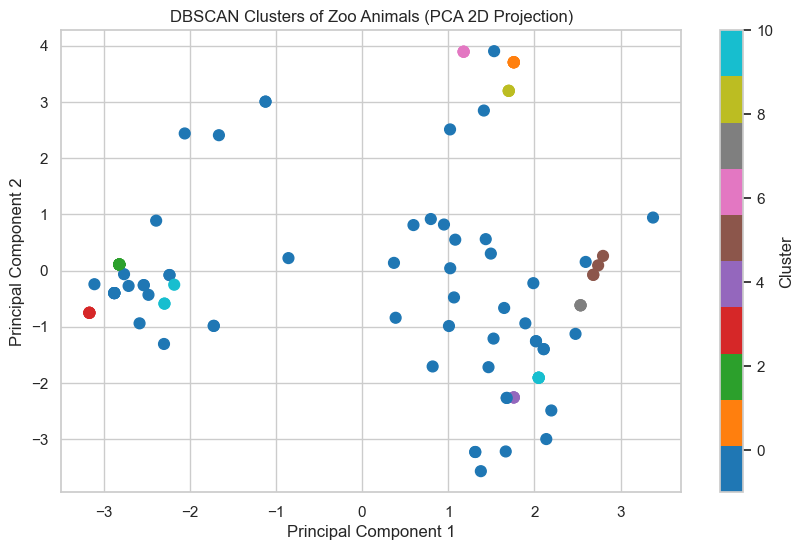

In [80]:
#Visualize cluster assignments (2D plot with PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Reduce to 2 principal components
pca = PCA(n_components=2)
zoo_pca = pca.fit_transform(zoo_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(zoo_pca[:, 0], zoo_pca[:, 1], c=zoo_df['cluster'], cmap='tab10', s=60)

plt.title("DBSCAN Clusters of Zoo Animals (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# The original dataset had 16 features (like hair, feathers, eggs, etc.). To visualize the clusters, we used PCA to reduce the data to just 2 dimensions while keeping most of the important information.
#Each dot is an animal. Dots with the same color belong to the same cluster as predicted by DBSCAN.
#This helps us see how well animals grouped together based on their features.

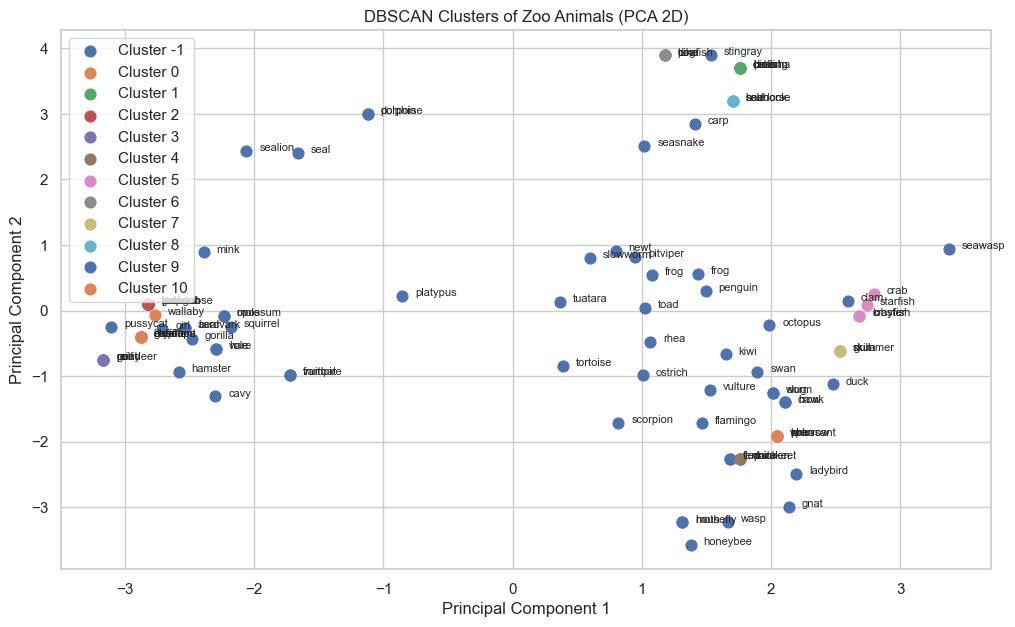

In [81]:
# Labeled Cluster Plot with Outliers Highlighted
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
zoo_pca = pca.fit_transform(zoo_scaled)

# Combine PCA components with original animal names and clusters
pca_df = pd.DataFrame(zoo_pca, columns=['PC1', 'PC2'])
pca_df['animal'] = zoo_df['animal_name']
pca_df['cluster'] = zoo_df['cluster']

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plot all points, color by cluster
for cluster_id in sorted(pca_df['cluster'].unique()):
    cluster_data = pca_df[pca_df['cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_id}', s=60)

    # Label each point with animal name
    for _, row in cluster_data.iterrows():
        plt.text(row['PC1'] + 0.1, row['PC2'], row['animal'], fontsize=8)

plt.title("DBSCAN Clusters of Zoo Animals (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#  How to Explain This (Non-Technical):
#This chart shows how animals were grouped based on their characteristics (like hair, feathers, etc.) using DBSCAN.
#We used PCA to simplify the data into 2D for visualization.
#Each dot is an animal.
#Color shows the cluster it belongs to.
#Labels are animal names.
#Animals marked as Cluster -1 are outliers — they didn’t fit well into any group.

In [82]:
# Based on the graph or cluster code, how do I know which animal belongs to which group?
zoo_df[zoo_df['cluster'] == 1][['animal_name', 'hair', 'feathers', 'eggs', 'milk']]

,animal_name,hair,feathers,eggs,milk
2,bass,0,0,1,0
8,catfish,0,0,1,0
12,chub,0,0,1,0
38,herring,0,0,1,0
61,piranha,0,0,1,0


In [ ]:
#Assumption
#Type	Animal Group	Example Animals
#1	Mammals	lion, bear, giraffe, girl (!), etc.
#2	Birds	owl, chicken, duck, sparrow, etc.
#3	Reptiles	pitviper, seasnake, tortoise
#4	Fish	tuna, bass, piranha
#5	Amphibians	frog, toad, newt
#6	Insects	ant, wasp, termite
#7	Invertebrates	crab, clam, worm, starfish

In [83]:
# Evaluating the Model
from sklearn.metrics import adjusted_rand_score

# Adjusted Rand Index compares clustering vs true labels
ari = adjusted_rand_score(zoo_df['type'], zoo_df['cluster'])
print("Adjusted Rand Index (ARI):", round(ari, 3))

Adjusted Rand Index (ARI): 0.016


In [ ]:
# Interpretation:
#1.0 = perfect match between cluster and true types.
#0.0 = clustering is random.
#Negative = worse than random.

In [ ]:
#The Adjusted Rand Index (ARI) measures how similar your clustering results (from DBSCAN) are to the actual biological classifications (the type column in the dataset).
#🔢 Your Result:
#ARI = 0.016
#This value is very close to 0, which tells us:
#🧠 DBSCAN's clusters are not very similar to the original types (like mammal, bird, fish, etc.)

In [84]:
# Another Measure
from sklearn.metrics import silhouette_score

# Only compute score if there is more than one cluster and no outliers only
if len(set(dbscan.labels_)) > 1 and -1 in dbscan.labels_:
    filtered_data = zoo_scaled[dbscan.labels_ != -1]
    filtered_labels = dbscan.labels_[dbscan.labels_ != -1]
    score = silhouette_score(filtered_data, filtered_labels)
    print("Silhouette Score (excluding outliers):", round(score, 3))

Silhouette Score (excluding outliers): 0.953


In [ ]:
#Interpretation:
#Closer to 1 → better clustering.
#Around 0 → overlapping clusters.
#Negative → poor clustering (points assigned to wrong clusters).

#Silhouette Score = 0.953
#This is very close to 1, which is excellent. Here's what it means:

#✅ The animals within each cluster are very similar to each other, and
#❌ very different from animals in other clusters.

#📊 Silhouette Score Scale:
#Score Range	Interpretation
#0.7 – 1.0	Excellent — well-separated, clear clusters ✅
#0.5 – 0.7	Good — reasonably well separated
#0.3 – 0.5	Average — overlapping clusters
#< 0.3	Poor — likely not meaningful clusters ⚠️
#< 0	Very bad — data points in wrong clusters ❌


#Your clustering groups animals based on their shared traits, but not the same way humans define “mammal,” “bird,” etc.
#DBSCAN has found natural groupings in the data — not necessarily the labeled type.